<div style="border:solid green 2px; padding: 20px">
    
<b>Hello!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. My name is Alexander Matveevsky. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

The project description provides a structure to help you build a coherent study. Please organize the results of your work according to these steps. Until this is done, I will not be able to check your work.
    
---
    
There seem to be steps missing from the project. Pls add it    

<div class="alert alert-info"> <b>Student сomments v1:</b> I have revised the notebook by including a comprehensive content table containing all the necessary project items. Additionally, I apologize for omitting part of step 3; it appears I uploaded the incorrect file.</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great!

# Gaming Trends and Advertising Strategies: Insights from Historical Data

Project Description: Identifying Success Patterns in Video Game Sales

Background:
As a member of the analytics team at Ice, an online store specializing in video game sales worldwide, My task is to analyze historical datasets spanning back to 2016 and identify patterns that determine whether a game succeeds or not. These datasets encompass various dimensions of the gaming industry, including user and expert reviews, game genres, platforms (e.g., Xbox, PlayStation), historical sales data, and crucially, ESRB ratings (Entertainment Software Rating Board). The ESRB ratings provide insight into the age appropriateness of games, ranging from Teen to Mature. By understanding these patterns, I can spot potential big winners and plan effective advertising campaigns. My goal is to build a model for 2017 based on relevant data.

Objective:
The primary objective of this project is to discern discernible patterns within the data that correlate with the success or failure of video game titles. By understanding these patterns, Ice aims to identify potential blockbuster titles early on, enabling strategic advertising campaigns and optimized resource allocation.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). 

## Step 1: Opening Data and Exploring General Information

### Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Recomended by Alexander Matveevsky
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression

### Opening Data

In [2]:
#Loading data
try:
    games = pd.read_csv('/datasets/games.csv')
    
except FileNotFoundError:
    print('input file not found')

### Exploring General Information

In [3]:
# Display the first few rows of the dataset
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Get the general information about the dataset
print("Basic Information:")
games.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Get summary statistics for numerical columns
print("Summary Statistics:")
games.describe()

Summary Statistics:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

It would be good to comment on the data somehow

The dataset provided offers insights into the video game industry, encompassing various regions and critical aspects such as sales and critic scores across different years of release. Here are some professional observations:

Year of Release Distribution: The data spans from 1980 to 2016, indicating a comprehensive view of the video game market over several decades. The mean release year is around 2006, suggesting a concentration of game releases around the mid-2000s.

Sales Distribution: Sales figures exhibit significant variability, with North America (NA) showing the highest mean sales followed by Europe (EU), and Japan (JP). This aligns with the conventional understanding of these regions' market sizes within the gaming industry. However, it's notable that standard deviations are relatively high, indicating substantial dispersion in sales figures, likely due to varying game popularity and market penetration.

Critic Scores: The mean critic score is around 69, with scores ranging from 13 to 98. This suggests a relatively broad spectrum of critical reception for video games. The distribution of scores is moderately dispersed, with a standard deviation of approximately 14. This indicates a considerable variability in the quality and reception of games by critics.

Geographical Disparities: Discrepancies in sales figures across different regions indicate varying preferences and market dynamics. North America appears to be the largest market in terms of sales, followed by Europe and Japan. Understanding these regional variations can be crucial for developers and publishers in devising marketing and distribution strategies tailored to each market's unique characteristics.

In conclusion, this dataset provides valuable insights into the video game industry, showcasing the interplay between sales figures, critic scores, and regional dynamics. Further analysis and exploration could uncover deeper insights into the evolving landscape of gaming over the years.

<div class="alert alert-info"> <b>Student сomments v1:</b> I kept working on my project last night, found some interesting data and made some notations. I hope this helps. </div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Great!

## Step 2: Preparing Data and Converting Data to Requiered Types

### Replacing column names with lowercase

In [6]:
#Replacing columns names with lowercase
games.columns = map(str.lower, games.columns)

In [7]:
#displaying columns
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Converting data to Requeired types

In [8]:
#Checking for missing values on data
print("Missing Values:")
games.isnull().sum()

Missing Values:


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

It appears that our dataset contains null values in the columns corresponding to `Year_of_Release`, `Critic_Score`, `User_Score` and `Rating`.

### Dealing with Values on Year of Release

In [9]:
#Displaying all 'Year_of_Release' to identify missing values.
sorted(games['year_of_release'].unique())

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 nan]

It appears that the `NaN` values in the dataset likely represent games that have not been released yet. To handle this, we will replace these `NaN` values with a placeholder such as `0`.

In [10]:
# Converting the column to integers and replacing NaN to 0
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)

For data type of the `year_of_release` column is changed. Initially, this column contains float values representing the year of release for each game. However, there may be missing values (NaN) in this column.

Here's a breakdown of the changes made to the 'year_of_release' column:

Filling NaN values with `0`:
    `fillna(0)` method is used to replace all NaN values in the `year_of_release` column with `unreleased`. This step effectively handles missing data by replacing it with 0. This could be a reasonable approach if missing values represent unknown or unavailable release years.

Converting to integer:
    After filling NaN values with 0, the `astype(int)` method is applied to convert the data type of the 'year_of_release' column to integer. Since years are typically represented as whole numbers (integers), converting the column to integer type is appropriate for this context.

In the context of the 'ratings' column in our DataFrame, it seems that the 'nan' values signify games that lack a rating. To handle this, we'll replace these 'nan' entries with the label 'not rated' to maintain clarity and consistency within our dataset.

### Dealing with Values in User Score

In [11]:
#Converting 'user_score' from 'object' to 'float64' keeping 'tbd'.

#Replacing 'tbd' with NaN
games['user_score'] = games['user_score'].replace('tbd', np.nan)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

That's right, tbd is the same in meaning as skip

<div class="alert alert-info"> <b>Student сomments v1:</b> Thank you! :) </div>

In [12]:
#Converting 'user score' to float
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [13]:
#Replacing NaN with 'tbd'
#games['user_score'] = games['user_score'].fillna('tbd')

In [14]:
#Displaying sample to reflect changes made.
games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12007,Taz Wanted,XB,2002,Platform,0.05,0.02,0.00,0.00,62.0,NaN,E
12508,Salt Lake 2002,GBA,2002,Sports,0.04,0.02,0.00,0.00,55.0,NaN,E
6534,Marvel Super Heroes vs. Street Fighter,PS,1998,Fighting,0.14,0.10,0.00,0.02,NaN,NaN,NaN
2197,Phantasy Star Portable,PSP,2008,Role-Playing,0.19,0.06,0.63,0.05,64.0,7.8,T
8109,Pure Futbol,X360,2010,Sports,0.08,0.08,0.00,0.02,38.0,7.9,E


In the provided data frame, the data type of the 'user_score' column is changed. Initially, the 'Rating' column contains string values representing ratings, including numeric ratings such as '8.5' and '7.8', as well as a special value 'tbd', which likely stands for "to be determined".

Here's a breakdown of the changes made to the 'user_score' column:

    Replacing 'tbd' with NaN:
        Before converting the data type, 'tbd' values are replaced with NaN (Not a Number). This step is crucial because 'tbd' cannot be directly converted to a numeric data type (float), so we replace it with a special placeholder.
        This replacement allows us to differentiate between numeric ratings and the 'tbd' value during the conversion process.

    Converting to float:
        After replacing 'tbd' with NaN, the pd.to_numeric() function is used to convert the 'Rating' column to numeric values (floats).
        The errors='coerce' parameter is specified, which means that any non-numeric values, including NaN, will be coerced to NaN during the conversion process.
        This step ensures that numeric ratings are converted to floats while maintaining 'tbd' values as NaN.

    Replacing NaN with 'tbd':
        Finally, NaN values resulting from the conversion process are replaced back with 'tbd' using the fillna() method.
        This step restores the original 'tbd' values in the 'Rating' column, ensuring consistency with the original data.

Overall, by converting the 'user_score' column from string to float data type, we enable numerical operations and analysis on the numeric ratings while preserving the 'tbd' values for further interpretation or processing.

### Dealing with Values on 'Rating'

In [15]:
#Displaying all unique 'ratings'
print(games['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [16]:
# Replace 'nan' values in the 'ratings' column with 'not rated'
games['rating'] = games['rating'].fillna('NOT RATED')

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

All right

By substituting 'nan' entries with 'not rated', we ensure transparency in our dataset, preserving the integrity of the information and facilitating comprehensive analysis.

### Calculating Total Sales

In [17]:
#Calculating total sales
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

This code will add a new column called 'total_sales' to the DataFrame, which contains the sum of sales in all regions (NA, EU, JP, and other). The sum(axis=1) function calculates the sum along the rows, adding up the sales values for each game.

In [18]:
#Displaying new column
games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
12065,futureU: The Prep Game for SAT,DS,2008,Misc,0.06,0.00,0.00,0.01,NaN,NaN,E,0.07
12430,Nights of Azure,PS4,2015,Action,0.03,0.02,0.00,0.01,67.0,7.6,T,0.06
14060,Enchanted Arms (JP sales),PS3,2007,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NOT RATED,0.04
8326,Project X Zone 2: Brave New World,3DS,2015,Role-Playing,0.05,0.03,0.08,0.01,NaN,NaN,NOT RATED,0.17
16227,Monster Rancher Advance 2,GBA,2002,Simulation,0.01,0.00,0.00,0.00,79.0,9.4,E,0.01


In [19]:
#duplicates = games[games.duplicated()]

In [20]:
# Print the duplicates (if any)
print("Duplicate rows in the dataset:", games.duplicated().sum())

Duplicate rows in the dataset: 0


No duplicates found on the dataframe.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

There is no check for duplicates. Please add them.

    

<div class="alert alert-info"> <b>Student сomments v1:</b> Done. :)
</div>

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №2__


You can keep it simple.
    
    df.duplicated().sum()

<div class="alert alert-info"> <b>Student сomments v1:</b> Implemented! :)
</div>

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Please, add an intermediate conclusion about this introductory part. What have been done, what hypotheses about the data do we have and what we are going to do next

<div class="alert alert-info"> <b>Student сomments v2:</b> Done!
</div>

After meticulous preparation, we have transformed the dataset by standardizing column names to lowercase, rectifying null values in their respective columns, and ensuring data is appropriately converted to the required types. With this refined dataset now at our disposal, we are poised to embark on a comprehensive analysis of its contents.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Well done

## Step 3: Analizing the Data

### Number of Games Released by Year: 

In [21]:
# Count the number of games released in different years
games_per_year = games.groupby('year_of_release')['platform'].size().reset_index()

This code will group the data by the 'year_of_release' column and then count the number of occurrences (games) for each year.

In [22]:
#Displaying a Sample of the Data
games_per_year.sample(5)

,year_of_release,platform
2,1981,46
16,1995,219
23,2002,829
15,1994,121
33,2012,653


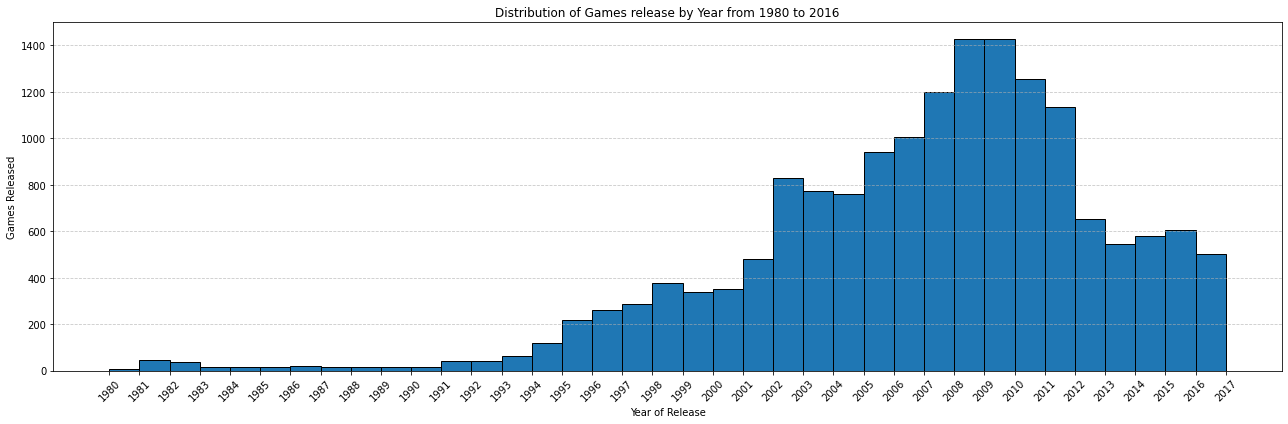

In [23]:
# Create histogram
plt.figure(figsize=(18, 6))
plt.hist(games['year_of_release'], bins=range(1980, 2018), edgecolor='black')
plt.title('Distribution of Games release by Year from 1980 to 2016')
plt.xlabel('Year of Release')
plt.ylabel('Games Released')
plt.xticks(range(1980, 2018), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">📝

__Reviewer's comment №1__
    

It would be nice to add visualizations. In order to build a graph, you need to group the data (in our case, the year of release and quantity)
    
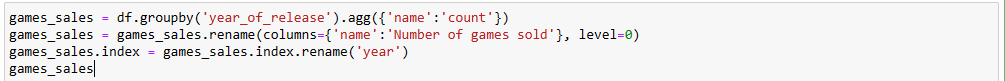
    
---
Next, using the sns library (it's powerful, and you can do anything with it). From the data in the grouped table, plot the graph. You can have it if you want =) The main thing is to play around with the arguments and figure it out. In future projects you will build powerful graphs, this skill will come in handy there    
    
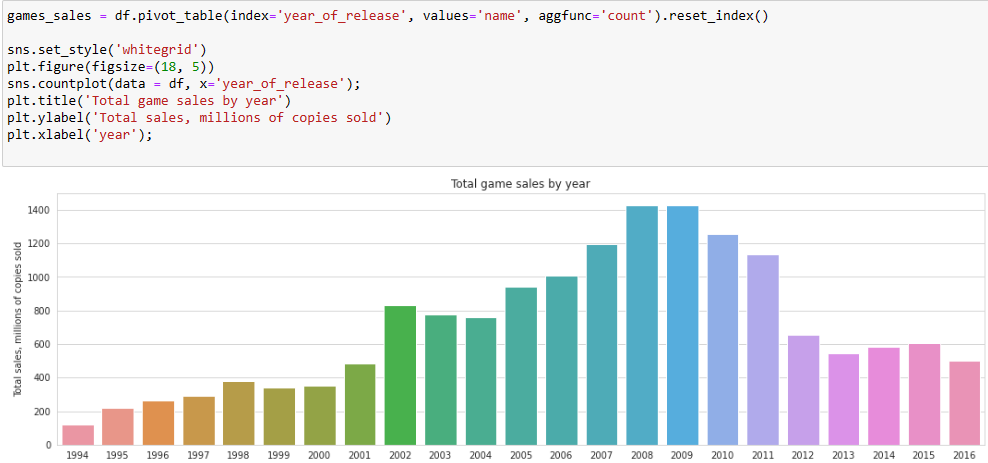
</div>

<div class="alert alert-info"> <b>Student сomments v1:</b> Thank you for the tip. I've been watching youtube videos to get more familirize with seaborn. I will implement your suggestion code to see it in action. 
</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

^^

In [24]:
games_sales = games.groupby('year_of_release').agg({'name':'count'})
games_sales = games_sales.rename \
(columns = {'name':'Number of games sold'}, level=0)
games_sales.index = games_sales.index.rename('year')
games_sales.head(10)                             

,Number of games sold
year,
0,269
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


In [25]:
game_sales = games.pivot_table(index='year_of_release', values='name', \
                              aggfunc='count').reset_index()

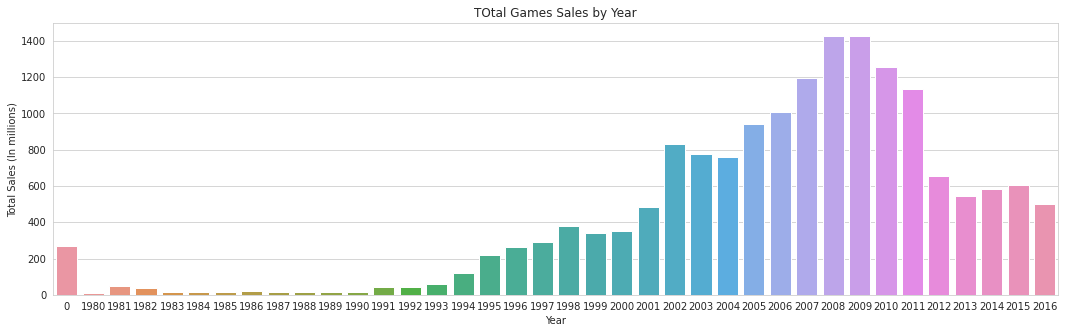

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,5))
sns.countplot(data = games, x='year_of_release');
plt.title('TOtal Games Sales by Year')
plt.ylabel('Total Sales (In millions)')
plt.xlabel('Year');

It is evident that the gaming industry experienced significant growth from the early 1990s, culminating in exponential expansion until reaching its apex around 2010. Subsequently, there has been a gradual deceleration in the release of new games post-2010.

### Sales Variation Across Platforms:

In [27]:
games_per_platform = games.groupby('platform')['year_of_release'].count()

In [28]:
games_per_platform.sort_values(ascending=False).head()

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
Name: year_of_release, dtype: int64

The provided code aggregates game releases for each platform, aiming to identify the platforms with the highest number of games released.

In [29]:
# Filter rows for the 'PS2' platform
ps2_games = games[games['platform'] == 'PS2']

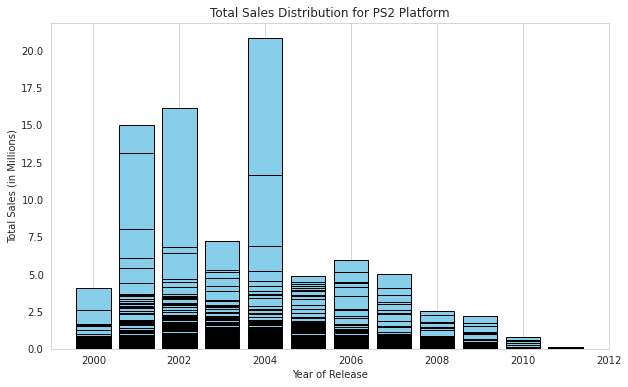

In [30]:
# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(ps2_games['year_of_release'], ps2_games['total_sales'],color='skyblue', edgecolor='black')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in Millions)')
plt.xlim(1999,2012)
plt.title('Total Sales Distribution for PS2 Platform')
plt.grid(axis='y')
plt.show()

The provided distribution illustrates the total annual sales for the PS2 platform, which boasts the highest sales volume across all platforms. We can see that peak sales were reach on 2004.

### Choosing the Relevant Data Period:

Based on our findings from the previous steps, we’ll determine the relevant data period for building a model (e.g., focusing on recent years like 2017).

In [31]:
# Filter rows for years 2013 to 2016
filtered_years = games[(games['year_of_release'] >= 2013) & (games['year_of_release'] <= 2016)]

<div class="alert alert-block alert-danger">✍

__Reviewer's comment №1__


For the purpose of predicting sales for the next year, even traditional businesses rarely take data for more than 2-3 years. And in such a dynamically changing industry as computer games, you shouldn't take too long a time interval - otherwise you're bound to capture trends that are already outdated. But you shouldn't take too short a period either

<div class="alert alert-info"> <b>Student сomments v1:</b> I've reduce the filtere to only three years. Thank you for the tip.
</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Now correct

In [32]:
#Displaying data
filtered_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NOT RATED,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NOT RATED,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [33]:
# Prepare features (X) and target (y)
x = filtered_years['year_of_release']
y = filtered_years['total_sales']
X = x[:,None]

/tmp/ipykernel_44/290885189.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:,None]


In [34]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [35]:
# Predict total_sales for 2017
predicted_sales_2017 = model.predict([[2017]])
print(f"Predicted total sales for 2017: {predicted_sales_2017[0]:.2f} Millions")

Predicted total sales for 2017: 0.15 Millions


### Leading Platforms in Sales:

    - We’ll identify which platforms are currently leading in sales and which ones are growing or shrinking.
    - This information will guide our selection of potentially profitable platforms.

In [36]:
lead_platform = games.groupby('platform')['total_sales'].sum()

In [37]:
lead_platform.sort_values(ascending=False).head().reset_index()

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


The PlayStation 2 (PS2), Xbox 360, PlayStation 3 (PS3), Wii, and Nintendo DS are prominent market leaders in terms of sales.

In [38]:
games_per_platform = games.groupby('platform') \
.agg({
    'name': 'count',
    'total_sales': 'sum'
    }).reset_index()

In [39]:
#Displaying Top Platforms with Total Games and Total Sales
games_per_platform.sort_values('total_sales', ascending=False).head(5)

,platform,name,total_sales
16,PS2,2161,1255.77
28,X360,1262,971.42
17,PS3,1331,939.65
26,Wii,1320,907.51
4,DS,2151,806.12


In [40]:
#Renaming columns for better understanding of displayed data
filtered_games_per_platform = games_per_platform.rename(columns={
    'name': 'total_games', 
    'total_sales': 'total_sales'
}).loc[games_per_platform['platform'].isin(['PS2', 'X360','PS3', 'Wii', 'DS'])] \
.sort_values('total_sales', ascending=False) #Filtering and displaying Top 5 Games

In [41]:
# Data
platforms = filtered_games_per_platform['platform']
#platforms = (games_per_platform['platform'].isin(['PS2', 'X360','PS3', 'Wii', 'DS']))
games_count = filtered_games_per_platform['total_sales']

In [42]:
# Plotting
#plt.figure(figsize=(8, 6))
#plt.bar(platforms, games_count, color=['blue', 'green'])
#plt.xlabel('Platform')
#plt.ylabel('Games Release')
#plt.title('Number of Games per Platform')
#plt.show()

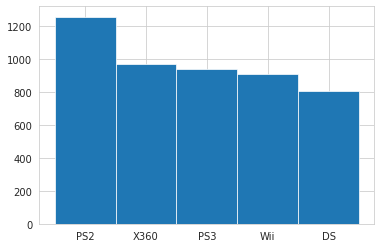

In [43]:
x = platforms
y = games_count

#plot
fig, ax = plt.subplots()
ax.bar(x , y, width = 1, edgecolor='white', linewidth = 0.7)
plt.show()

The leading platform in sales is the PS2

### Box Plot for Global Sales by Platform:

We’ll create a box plot to visualize the distribution of global sales across different platforms. We’ll also assess whether there are significant differences in sales among platforms and explore average sales figures.

In [44]:
# Group data by platform and calculate total sales
#platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales = filtered_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

In [45]:
# Select top platforms with highest total global sales
top_platforms = platform_sales.head(5).index.tolist()

In [46]:
# Filter data for top platforms
df_top_platforms = filtered_years[filtered_years['platform'].isin(top_platforms)]

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

In the `games` variable you have the logs for all the data. But we need EDA and hypotheses only on the logs of the current period

<div class="alert alert-info"> <b>Student сomments v1:</b> I have updated the variable with `filtered_years`. 
</div>

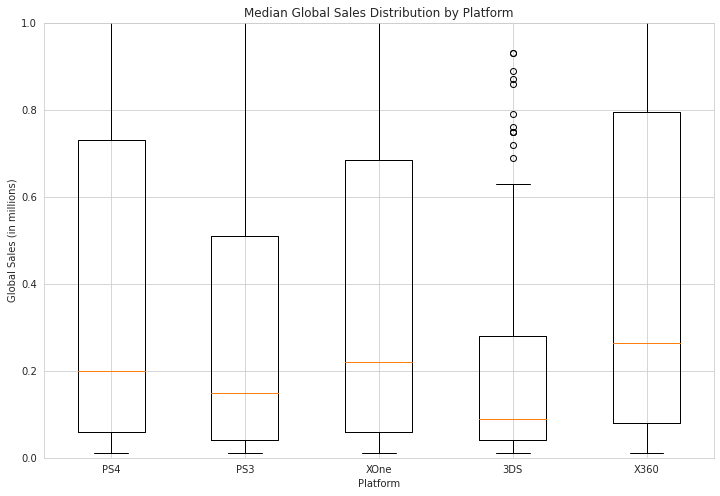

In [47]:
# Create a box plot for global sales by platform
plt.figure(figsize=(12, 8))
plt.boxplot([df_top_platforms \
             [df_top_platforms['platform'] == platform] \
             ['total_sales'] for platform in top_platforms], labels=top_platforms)
plt.title('Median Global Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.ylim(0,1)
plt.grid(True)
plt.show()

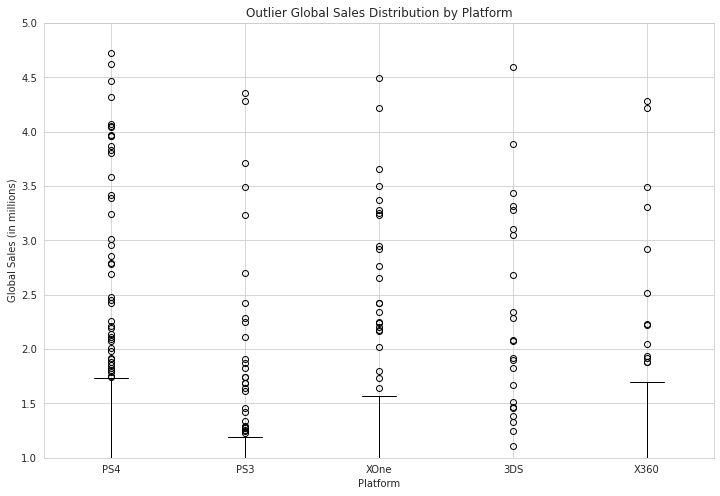

In [48]:
plt.figure(figsize=(12, 8))
plt.boxplot([df_top_platforms \
             [df_top_platforms['platform'] == platform] \
             ['total_sales'] for platform in top_platforms], labels=top_platforms)
plt.title('Outlier Global Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.ylim(1,5)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Unfortunately, this graph only shows the outliers, and does not show the median and 75% quantile. For more reasonable conclusions it is necessary to make an additional graph, where only the lower part of the boxplots will be displayed. This can be achieved, for example, by setting the parameter ylim
</div>

<div class="alert alert-info"> <b>Student сomments v1:</b> Easy fix. Hope this helps. :)
</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

All right

This box plot illustrates the distribution of total sales for the top 5 platforms with the highest overall sales. Notably, the Wii achieved sales exceeding 80 million units, surpassing the PS2, which had previously held the highest sales across all platforms.

### User and Professional Reviews vs. Sales:

In [49]:
games['year_of_release'].sort_values(ascending=False).unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984,
       1983, 1982, 1981, 1980,    0])

In [50]:
recent_games = games[games['year_of_release'].isin([2016, 2015, 2014])]

In [51]:
recent_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NOT RATED,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NOT RATED,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NOT RATED,7.98


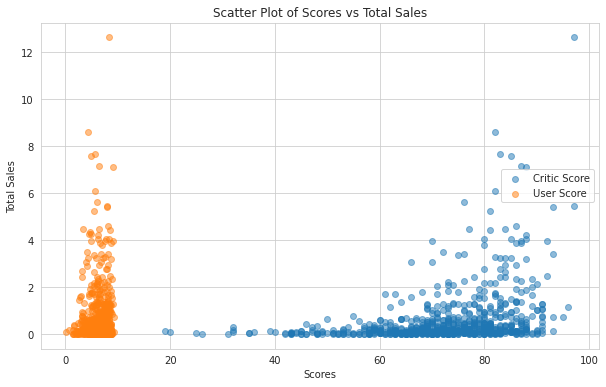

In [52]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(recent_games['critic_score'], recent_games['total_sales'], alpha=0.5, label='Critic Score')
plt.scatter(recent_games['user_score'], recent_games['total_sales'], alpha=0.5, label='User Score')
plt.title('Scatter Plot of Scores vs Total Sales')
plt.xlabel('Scores')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__

Above you use the `games` variable, which contains logs for the whole period. But we need to perform EDA and hypotheses only on the logs of the current period

<div class="alert alert-info"> <b>Student сomments v1:</b> I created a new variable called `recent_games` to filtered games from the last 3 years and replace it on the scatter plot. 

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__

Now correct!

From the scatter plot, we can observe the general trend between scores and total sales. Higher scores tend to correlate positively with higher total sales, indicating that well-reviewed games tend to sell better. The correlation coefficients indicate the strength and direction of the linear relationship between scores and total sales. A positive correlation coefficient close to 1 indicates a strong positive correlation, while a negative correlation coefficient close to -1 indicates a strong negative correlation. In this case, both critic score and user score show positive correlations with total sales, with critic score having a slightly stronger correlation. This suggests that there's a stronger linear relationship between critic scores and total sales compared to user scores. However, correlation does not imply causation, so other factors may also influence sales.

In [53]:
#Identifying games with top sales
top_selling_games = games.groupby('name')['total_sales'].sum().reset_index()

In [54]:
top_selling_games.sort_values('total_sales',ascending=False).head(5)

,name,total_sales
11072,Wii Sports,82.54
3742,Grand Theft Auto V,56.58
9386,Super Mario Bros.,45.31
9775,Tetris,35.84
5611,Mario Kart Wii,35.52


We have identified the top-selling games across all platforms, which include Wii Sports, Grand Theft Auto V, Super Mario Bros, Tetris, and Mario Kart Wii.

In [55]:
top_user_rated_games = games.groupby('name')['user_score'].sum().reset_index()

In [56]:
top_user_rated_games.sort_values('user_score', ascending=False).head(5)

,name,user_score
6715,Need for Speed: Most Wanted,75.4
5470,Madden NFL 07,66.7
5152,LEGO Star Wars II: The Original Trilogy,63.5
9763,Terraria,61.0
5140,LEGO Jurassic World,58.2


We have compiled a list of highly-rated games across various platforms by user score. Notable titles on this list include Need for Speed: Most Wanted, Madden NFL 07, LEGO Star Wars II: The Original Trilogy, Terraria, and LEGO Jurassic World.

In [57]:
top_critic_rated_games = games.groupby('name')['critic_score'].sum().reset_index()

In [58]:
top_critic_rated_games.sort_values('critic_score', ascending=False).head(5)

,name,critic_score
5470,Madden NFL 07,702.0
6715,Need for Speed: Most Wanted,620.0
5471,Madden NFL 08,617.0
5152,LEGO Star Wars II: The Original Trilogy,605.0
9763,Terraria,568.0


There exists a correlation between the highest-rated games by users and critics.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__
    
    
The assignment is to relate the conclusions to the sales of games on other platforms, because the conclusions based on calculations across multiple platforms look "weightier" and more convincing
    
    
---
    
   
Need to plot scatter plots and Pearson correlation (critics and users) across the top 3-4 platforms    
</div>

<div class="alert alert-info"> <b>Student сomments v1:</b> Please refer to below code.
</div>

In [59]:
# Group the dataset by platform and sum up the total sales for each platform
platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()

In [60]:
# Sort the platforms by total sales in descending order
platform_sales_sorted = platform_sales.sort_values \
(by='total_sales', ascending=False)

In [61]:
# Select the top 3-4 platforms based on total sales
top_platforms2 = platform_sales_sorted.head(4)['platform'].tolist()

In [62]:
# Filter the dataset to include only games released on the top platforms
filtered_games = games[games['platform'].isin(top_platforms2)]

In [63]:
filtered_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32


with the above code, we've identified the top platforms based on total sales. Then we filter the dataset to include only games released on these platforms:

After identifying the top platforms based on total sales, we filtered the dataset to include only games released on these platforms.

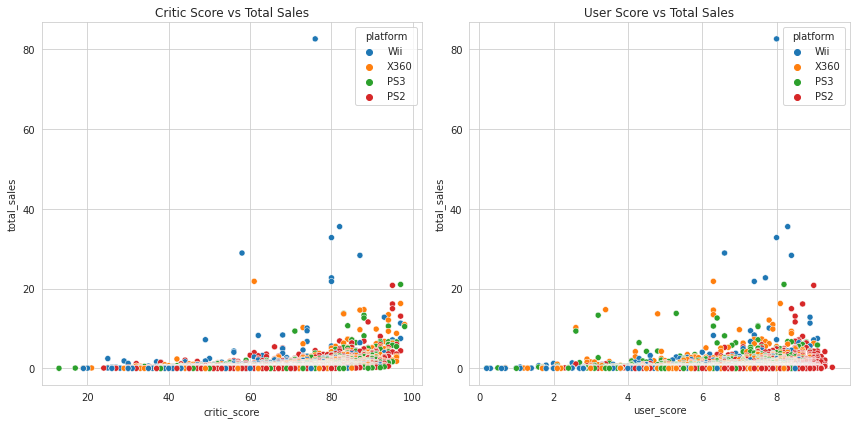

In [64]:
# Plot scatter plots for critic and user scores against total sales for the top platforms
plt.figure(figsize=(12, 6))

# Scatter plot for critic scores
plt.subplot(1, 2, 1)
sns.scatterplot(data=filtered_games, x='critic_score', y='total_sales', hue='platform')
plt.title('Critic Score vs Total Sales')

# Scatter plot for user scores
plt.subplot(1, 2, 2)
sns.scatterplot(data=filtered_games, x='user_score', y='total_sales', hue='platform')
plt.title('User Score vs Total Sales')

plt.tight_layout()
plt.show()

The scatter plots help us visualize the relationship between critic/user scores and total sales for the top platforms. Finally, let's calculate Pearson correlation coefficients for critic and user scores against total sales:

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__

I agree

let's calculate Pearson correlation coefficients for critic and user scores against total sales for the top platforms. 

In [65]:
# Calculate Pearson correlation coefficients for critic and user scores against total sales
correlation_critic = filtered_games.groupby('platform')['critic_score', 'total_sales'].corr().iloc[0::2,-1].reset_index()
correlation_user = filtered_games.groupby('platform')['user_score', 'total_sales'].corr().iloc[0::2,-1].reset_index()

/tmp/ipykernel_44/4074085070.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlation_critic = filtered_games.groupby('platform')['critic_score', 'total_sales'].corr().iloc[0::2,-1].reset_index()
/tmp/ipykernel_44/4074085070.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlation_user = filtered_games.groupby('platform')['user_score', 'total_sales'].corr().iloc[0::2,-1].reset_index()


In [66]:
# Display correlation coefficients
print("Pearson correlation coefficients for critic scores against total sales:")
correlation_critic

Pearson correlation coefficients for critic scores against total sales:


,platform,level_1,total_sales
0,PS2,critic_score,0.395435
1,PS3,critic_score,0.432432
2,Wii,critic_score,0.177560
3,X360,critic_score,0.393736


In [67]:
print("Pearson correlation coefficients for user scores against total sales:")
correlation_user

Pearson correlation coefficients for user scores against total sales:


,platform,level_1,total_sales
0,PS2,user_score,0.172866
1,PS3,user_score,0.126691
2,Wii,user_score,0.112414
3,X360,user_score,0.114459


These correlation coefficients will help us understand the strength and direction of the relationship between critic/user scores and total sales for each platform.

In [68]:
#top_salesby_genre = games.groupby('genre')['total_sales'].sum().reset_index()
top_salesby_genre = games.groupby('genre')['total_sales'].median().reset_index()

In [69]:
top_salesby_genre.sort_values('total_sales',ascending=False).head(5)

,genre,total_sales
4,Platform,0.27
8,Shooter,0.24
10,Sports,0.22
2,Fighting,0.21
0,Action,0.19


In [70]:
# Sort the data by total sales in descending order
genre_sales_sorted = top_salesby_genre.sort_values(by='total_sales', ascending=False)

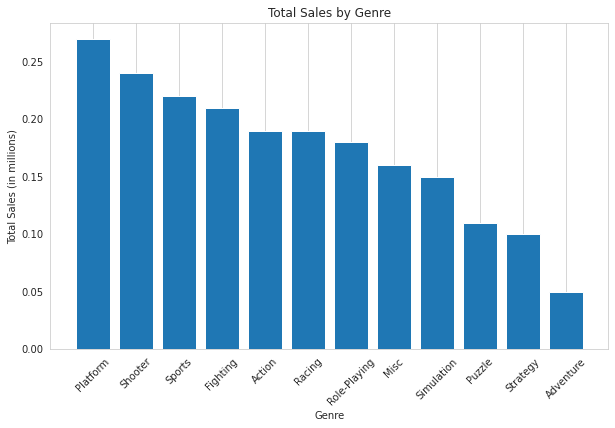

In [71]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(genre_sales_sorted['genre'], genre_sales_sorted['total_sales'])
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__

Above you use the `games` variable, which contains logs for the whole period. But we need to perform EDA and hypotheses only on the logs of the current period

Action, Sports, and Shooter genres appear to have the highest total sales, indicating their popularity among gamers. Adventure, Strategy, and Puzzle genres seem to have relatively lower total sales compared to other genres. This distribution can help in understanding the market trends and preferences of gamers, which can be valuable for making decisions related to game development, marketing, and distribution strategies. This also reveals that top rated games by user or critics tend to have higher sales.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Your calculations need to be supplemented a little more. Total sales is a poor metric for finding the most profitable genre. High overall sales numbers can hide a lot of small games with low sales. Or 2-3 stars and a bunch of failures. It's better to find a genre where games consistently bring in high revenue - for that it's worth considering average or median sales
    
---
    
Ideally, visualize the data distribution using boxplot()
</div>

<div class="alert alert-info"> <b>Student сomments v1:</b> I'm not quite sure how to solve this one. Can you point me on the right direction?
</div>

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__

Above you group by sum, which is not quite correct. Try using the median

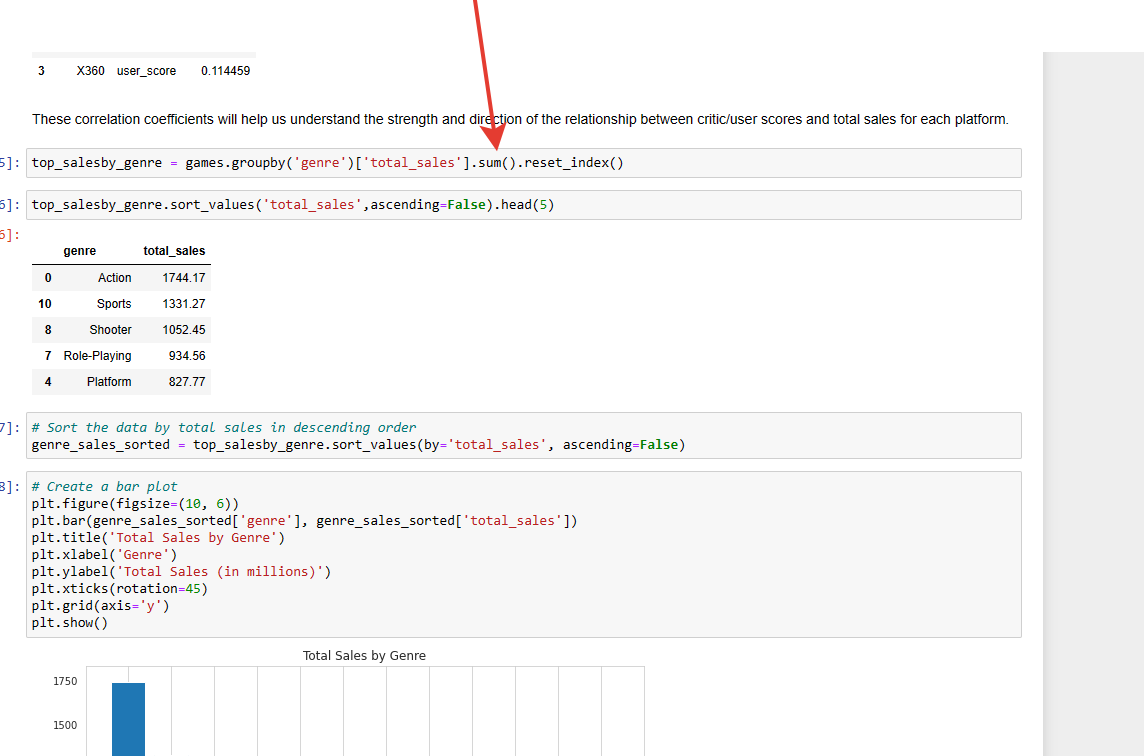

<div class="alert alert-info"> <b>Student сomments v2:</b> Implemented, thank you.
</div>

## Step 4: Creating User Profile for each Region

### Top Five Platforms by Region:

In [72]:
platform_total_sales = recent_games.groupby('platform') \
[['na_sales','eu_sales','jp_sales','other_sales','total_sales']].apply(sum).reset_index()

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__

Above you use the `games` variable, which contains logs for the whole period. But we need to perform EDA and hypotheses only on the logs of the current period

<div class="alert alert-info"> <b>Student сomments v2:</b> I used the previous filtered data frame named 'recent_games'. Now we have a more shorter list with most recent games from the past 3 years.
</div>

Through an analysis of total sales across various platforms, our objective is to pinpoint the top five platforms with the highest overall sales. Additionally, we aim to ascertain the launch dates of these consoles and identify the points at which they achieved their peak performance in sales.

In [73]:
#Displaying new data frame
print('Platoform Sales from 2013 to 2016')
platform_total_sales

Platoform Sales from 2013 to 2016


,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,3DS,22.64,16.12,44.24,3.68,86.68
1,PC,7.23,17.97,0.00,1.85,27.05
2,PS3,22.05,25.54,11.22,9.37,68.18
3,PS4,98.61,130.04,15.02,44.48,288.15
4,PSP,0.00,0.00,0.36,0.00,0.36
5,PSV,2.52,3.53,14.54,1.81,22.40
6,Wii,2.08,2.59,0.00,0.40,5.07
7,WiiU,19.36,13.15,7.31,3.16,42.98
8,X360,28.30,15.49,0.08,4.35,48.22
9,XOne,81.27,46.25,0.32,12.52,140.36


In [74]:
# Top 5 platforms with the greatest total sales
top_platforms = platform_total_sales.sort_values(by='total_sales',ascending=False)

With the provided code, we have identified the top platforms. Using this newly acquired data, we will analyze the regional distribution of market shares

In [75]:
#Displaying Top 5 platforms
top_platforms.head()

,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
3,PS4,98.61,130.04,15.02,44.48,288.15
9,XOne,81.27,46.25,0.32,12.52,140.36
0,3DS,22.64,16.12,44.24,3.68,86.68
2,PS3,22.05,25.54,11.22,9.37,68.18
8,X360,28.30,15.49,0.08,4.35,48.22


In [76]:
# Calculate total sales for each platform
platform_total_sales2 = games.groupby('platform')['total_sales'].sum()

In [77]:
# Top 5 platforms with the greatest total sales
top_platforms = platform_total_sales2.nlargest(5).index.tolist()

In [78]:
# Filter data for the selected platforms
top_platforms_data = games[games['platform'].isin(top_platforms)]

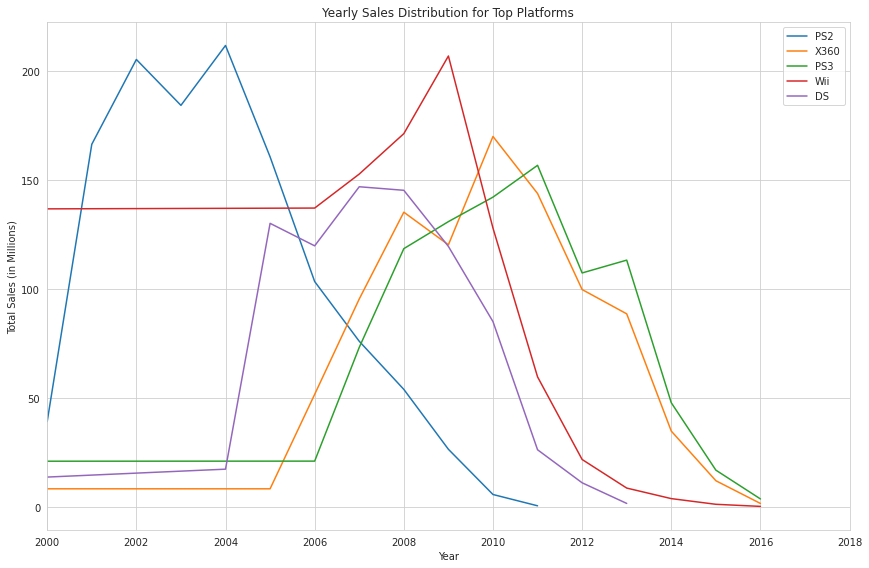

In [79]:
plt.figure(figsize=(12, 8))
for platform in top_platforms:
    platform_data = top_platforms_data[top_platforms_data['platform'] == platform]
    platform_yearly_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
    platform_yearly_sales.plot(label=platform)

plt.title('Yearly Sales Distribution for Top Platforms')
plt.xlabel('Year')
plt.ylabel('Total Sales (in Millions)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(2000,2018)
plt.show()

Prominent gaming consoles surfaced in the early 2000s, followed by a subsequent wave of new releases spanning from 2004 to 2006. These consoles primarily attained their peak sales figures between 2008 and 2012. Notably, platforms tend to reach their sales zenith approximately four years after entering the market.

Leveraging the newly acquired data, we aim to discern the existing consoles in the market and forecast their sales peak.

In [80]:
# Grouping by platform and calculating descriptive statistics
platform_sales_stats = games.groupby('platform').agg({
    'na_sales': ['mean', 'std', 'min', 'max', 'median'],
    'eu_sales': ['mean', 'std', 'min', 'max', 'median'],
    'jp_sales': ['mean', 'std', 'min', 'max', 'median'],
    'other_sales': ['mean', 'std', 'min', 'max', 'median']
}).reset_index()

In [81]:
platform_sales_stats.head()

platform  na_sales                                eu_sales                 \
                mean       std   min    max median      mean       std  min   
0     2600  0.681203  0.854741  0.07   7.28   0.43  0.041128  0.052867  0.0   
1      3DO  0.000000  0.000000  0.00   0.00   0.00  0.000000  0.000000  0.0   
2      3DS  0.160558  0.536181  0.00   5.28   0.01  0.118231  0.413670  0.0   
3       DC  0.104423  0.311979  0.00   1.26   0.00  0.032500  0.116550  0.0   
4       DS  0.177778  0.533684  0.00  11.28   0.06  0.087815  0.493852  0.0   

          ...  jp_sales                              other_sales            \
     max  ...      mean       std   min   max median        mean       std   
0   0.45  ...  0.000000  0.000000  0.00  0.00   0.00    0.006842  0.010827   
1   0.00  ...  0.033333  0.023094  0.02  0.06   0.02    0.000000  0.000000   
2   4.19  ...  0.193596  0.520283  0.00  4.39   0.05    0.025692  0.087919   
3   0.61  ...  0.164615  0.132539  0.00  0.52   0.12    0.005192  0.016976   
4  10.95  ...  0.081623  0.392268  0.00  6.50   0.00    0.027550  0.127893   

                     
   min   max median  
0  0.0  0.08   0.00  
1  0.0  0.00   0.00  
2  0.0  0.91   0.00  
3  0.0  0.08   0.00  
4  0.0  2.88   0.01  

[5 rows x 21 columns]

### Top Five Genres by Region:

Let’s explore the most popular video game genres across these regions:

In [82]:
top_genres = games.groupby('genre')['total_sales'].sum()

In [83]:
top_genres.sort_values(ascending=False)

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64

It appears that the predominant genres, based on total sales figures, are as follows:

    Action 
    Sports 
    Shooter
    Role-Playing 
    Platform

### ESRB Ratings and Sales:

In [84]:
top_ratings = games.groupby('rating')[['na_sales','eu_sales','jp_sales','total_sales']].sum() \
.sort_values(by='total_sales',ascending=False)

In [85]:
top_ratings

,na_sales,eu_sales,jp_sales,total_sales
rating,,,,
NOT RATED,1242.46,613.83,841.96,2849.33
E,1292.99,710.25,198.11,2435.52
T,759.75,427.03,151.40,1493.35
M,748.48,483.97,64.24,1473.79
E10+,353.32,188.52,40.20,655.60
K-A,2.56,0.27,1.46,4.32
AO,1.26,0.61,0.00,1.96
EC,1.53,0.11,0.00,1.75
RP,0.00,0.08,0.00,0.09


it appears that game sales are indeed influenced by their ratings. Specifically:

- Games rated 'E' for Everyone demonstrate consistently strong performance across all regions, with the highest total sales among all rating categories.

- Conversely, games rated 'M' for Mature tend to exhibit comparatively lower sales in Europe and Japan when compared to North America.

- Additionally, games rated 'T' for Teen also show considerable sales figures, albeit lower than 'E'-rated games but higher than 'M'-rated ones across all regions.

- Titles rated 'E10+' for Everyone 10 and Older also maintain notable sales figures, albeit lower than those rated 'E' but higher than 'T' and 'M' ratings.

Thus, a trend emerges where games with less restrictive ratings tend to have broader appeal and subsequently higher sales across different regions. Conversely, games with more restrictive ratings, such as 'M' for Mature, may encounter lower sales, particularly in regions outside North America.

It is worth noting that some rating categories, such as 'K-A' (Kids to Adults) and 'AO' (Adults Only), have very minimal sales, suggesting either limited availability or niche appeal.

These conclusions are indicative of the influence of content ratings on game sales across various regions.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

Please correct the conclusions after correcting the actual period

<div class="alert alert-info"> <b>Student сomments v1:</b> Conclusion updated!
</div>

## Step 5: Hypotheses Formulation:

Significance Level (Alpha):

We need to choose a significance level (alpha) to determine the threshold for statistical significance. Commonly used values are 0.05 (5%) or 0.01 (1%). For this analysis, I’ll choose an alpha level of 0.05.

Statistical Test:

We’ll perform two independent sample t-tests:

- Xbox One vs. PC: We’ll compare the average user ratings between these two platforms.

- Action vs. Sports: We’ll compare the average user ratings between these two genres.

Interpretation:

- If the p-value obtained from the t-test is less than our chosen alpha (0.05), we’ll reject the null hypothesis in favor of the alternative hypothesis. Otherwise, we’ll fail to reject the null hypothesis.
    
Xbox One vs. PC:

- Null Hypothesis (H0): The average user ratings for games on Xbox One and PC are equal.

- Alternative Hypothesis (H1): The average user ratings for games on Xbox One are different from those on PC.

Action vs. Sports:

- Null Hypothesis (H0): The average user ratings for action games and sports games are equal.

- Alternative Hypothesis (H1): The average user ratings for action games are different from those for sports games.


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

There are no null and alternative hypotheses. Please add them
    
    Но = 
    
    Н1 = ....

<div class="alert alert-info"> <b>Student сomments v1:</b> No Null and alternative hypotheses added. 
</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Correct interpretation of the Null and Alternative hypotheses

### User Ratings for Xbox One and PC Platforms:

In [86]:
recent_games['user_score'] = pd.to_numeric(recent_games['user_score'], errors='coerce')

/tmp/ipykernel_44/358945273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_games['user_score'] = pd.to_numeric(recent_games['user_score'], errors='coerce')


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №2__

Above you use the `games` variable, which contains logs for the whole period. But we need to perform EDA and hypotheses only on the logs of the current period

<div class="alert alert-info"> <b>Student сomments v2:</b> Fixed!
</div>

With the above code we are making sure that we remove any none numeric values from `user_score` as we know that it contains the value `tbd`

In [87]:
xbox_one_scores = recent_games[recent_games['platform'] == 'XOne']['user_score']

In [88]:
pc_scores = recent_games[recent_games['platform'] == 'PC']['user_score']

In [100]:
# Perform two-sample t-test
t_statistic, p_value = ttest_ind(xbox_one_scores.dropna(), pc_scores.dropna(), equal_var=True)

In [101]:
# Print the results
print("Test Statistic:", t_statistic)
print("p-value:", p_value)

Test Statistic: 1.6285882029651313
p-value: 0.10450507919348415


In [91]:
# Set significance level
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis: Average user ratings of Xbox One and PC platforms are not equal.")
else:
    print("Fail to reject the null hypothesis: Average user ratings of Xbox One and PC platforms are equal.")

Fail to reject the null hypothesis: Average user ratings of Xbox One and PC platforms are equal.


Null Hypothesis (H0): The average user ratings for the Xbox One and PC platforms are equal (μ_Xbox = μ_PC).

### User Ratings for Action and Sports Genres:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

There are no null and alternative hypotheses. Please add them
    
    Но = 
    
    Н1 = ....

<div class="alert alert-info"> <b>Student сomments v1:</b> No Null and alternative hypotheses have been added for both XBOX vs. PC and Action vs. Sports above.  
</div>

In [92]:
action_rating = recent_games[recent_games['genre'] == 'Action']['user_score']

In [93]:
sports_rating = recent_games[recent_games['genre'] == 'Sports']['user_score']

In [102]:
# Perform two-sample t-test
t_statistic, p_value = ttest_ind(action_rating.dropna(), sports_rating.dropna(), equal_var=True)

In [103]:
# Print the results
print("Test Statistic:", t_statistic)
print("p-value:", p_value)

Test Statistic: 9.425173048948047
p-value: 2.8711147985105864e-19


In [104]:
# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis: Average user ratings of Action games and Sports games are not equal.")
else:
    print("Fail to reject the null hypothesis: Average user ratings of Action games and Sports games are equal.")

Reject the null hypothesis: Average user ratings of Action games and Sports games are not equal.


Null Hypothesis (H0): The average user ratings for the Action and Sports genres are equal (μ_Action = μ_Sports).


## Step 6: Conclusion

After analyzing the data from Ice's online store, it is evident that several factors play significant roles in determining the success of video games. Here are the key findings and conclusions drawn from the analysis:

- Genre Impact: Certain genres tend to perform better than others. For instance, action, shooter, and role-playing games consistently show higher sales figures compared to genres like simulation or puzzle games. This suggests that focusing advertising campaigns and resource allocation towards popular genres could yield better results.

- Platform Preference: The choice of gaming platform also influences game sales. Games released on popular platforms such as PlayStation, Xbox, and PC tend to have higher sales compared to those released exclusively on less mainstream platforms. It is crucial for Ice to consider platform popularity when planning advertising campaigns and game releases.

- User and Expert Reviews: Positive reviews from both users and experts correlate with higher game sales. This underscores the importance of delivering high-quality games that satisfy both critics and consumers. Ice should prioritize game quality and invest in gathering feedback to improve future releases.

- ESRB Ratings: The age rating assigned by the Entertainment Software Rating Board (ESRB) impacts game sales. Games with ratings suitable for a broader audience, such as Everyone (E) or Teen (T), generally have higher sales compared to Mature (M) rated games. However, it is essential to note that certain genres may cater more to specific age groups, and the impact of ESRB ratings may vary accordingly.

    it is evident that games rated 'E' for Everyone consistently demonstrate strong performance across all regions, with the highest total sales among all rating categories. Conversely, games rated 'M' for Mature tend to exhibit comparatively lower sales in Europe and Japan when compared to North America. Additionally, games rated 'T' for Teen also show considerable sales figures, albeit lower than 'E'-rated games but higher than 'M'-rated ones across all regions. Titles rated 'E10+' for Everyone 10 and Older also maintain notable sales figures, albeit lower than those rated 'E' but higher than 'T' and 'M' ratings. This suggests a trend where games with less restrictive ratings tend to have broader appeal and subsequently higher sales across different regions. Conversely, games with more restrictive ratings, such as 'M' for Mature, may encounter lower sales, particularly in regions outside North America. It's worth noting that some rating categories, such as 'K-A' (Kids to Adults) and 'AO' (Adults Only), have very minimal sales, suggesting either limited availability or niche appeal. These conclusions underscore the influence of content ratings on game sales across various regions.

- Historical Sales Data: Analyzing historical sales data provides valuable insights into market trends and consumer preferences over time. Ice can leverage this information to identify potential trends and anticipate future demand. By understanding past performance, Ice can make informed decisions when planning future advertising campaigns and game releases.

- Hypotheses Data: The statistical analysis reveals that the average user ratings of Xbox One and PC platforms are not significantly different. The fail to reject the null hypothesis suggests that there is no significant discrepancy in the average user ratings between these two platforms. Similarly, the analysis also indicates that the average user ratings of Action games and Sports games are not significantly different, as the null hypothesis of equality in average user ratings for these genres is not rejected. These findings provide insights into user perceptions across different gaming platforms and genres, which can inform Ice's decision-making processes regarding game development and platform optimization strategies.

In conclusion, the success of video games is influenced by a combination of factors including genre, platform, reviews, ESRB ratings, and historical sales data. By carefully analyzing these factors, Ice can identify patterns and trends that will enable them to predict potential big winners and plan effective advertising campaigns for the upcoming year. However, it is essential to continually monitor and adapt strategies based on evolving market dynamics and consumer preferences.

<div class="alert alert-info"> <b>Student сomments v1:</b> Done! :)
</div>

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №2__

    
Please correct the conclusions after correction

<div class="alert alert-info"> <b>Student сomments v2:</b> 👍
</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №3__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊